# Test 2 (70 points)

**THIS TEST IS AN INDIVIDUAL ASSESSMENT. THIS DOCUMENT AND YOUR ANSWERS ARE FOR YOUR EYES ONLY. Please do not discuss
this test with** ***anyone other than Prof. Forbes*** **until Wednesday, December 5.**

In loading and using this webpage you agree that you are a student in
CompSci 190 at Duke University in the Fall 2018 semester. 

This page
records the time at which you accessed the page, your Duke NetID, and
your IP address. You agree to complete the **Test 2**  Sakai quiz  before starting the test. By loading this page and the Sakai quiz, you affirm that you have and will
uphold the [Duke Community Standard](http://studentaffairs.duke.edu/conduct/about-us/duke-community-standard) in completing this Test. 

In particular you agree that you:
- **have not** and **will not** communicate with anyone about this test other than course
personnel (Prof. Forbes, Max Bartlett, or Kevin Zhang) between November 29 at 6:00pm and December 5 at 9:00am.
- **have not** looked at solution sets or program code from other courses.

**A note on sharing / reusing code:** I am well aware that a huge volume of code is available on the web to solve any number of problems. For this exam you are allowed to make use of any online resources (e.g. StackOverflow) but you must explicitly cite where you obtained any code you directly use (or use as inspiration). You are also not allowed to ask a question on an external forum, you can only use answers to questions that have already been answered.

Any recycled code that is discovered and is not explicitly cited will be treated as plagiarism. All communication with classmates is explicitly forbidden.

### Getting help

You are not allowed to post any public questions to Piazza about the material on this test. Any questions about the exam must be asked by email or via a *private* post on Piazza. 
### Policy
Violations of the test policy will be reported to the Undergraduate Conduct Board. If you are found responsible, you will receive a 0 grade for this test and it may result in additional penalties for the final course grade.


In [ ]:
# Run this cell to set up the notebook, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# These lines load the ability to submit.
from client.api.notebook import Notebook
ok = Notebook('test2.ok')

## 0. Academic Integrity Statement (1 point)

In the statement below, please replace the underscores with your name acknowledging that you have read and understood the Duke Community Standard.

*I, ____________, hereby state that I have not communicated with or gained information in any way from my classmates or anyone other than the Professor or TA during this exam, and that all work is my own.*

**Duke Community Standard:** Duke University is a community dedicated to scholarship, leadership, and service and to the principles of honesty, fairness, respect, and accountability. Citizens of this community commit to reflect upon and uphold these principles in all academic and non-academic endeavors, and to protect and promote a culture of integrity. Cheating on exams or plagiarism on homework assignments, lying about an illness or absence and other forms of academic dishonesty are a breach of trust with classmates and faculty, violate the Duke Community Standard, and will not be tolerated. Such incidences will result in a 0 grade for all parties involved. Additionally, there may be penalties to your final class grade along with being reported to the Undergraduate Conduct Board.


## 1. Project 2 Review Questions (9 points)

These problems address [Project 2](http://jupyterhub.cs.duke.edu/hub/user-redirect/git-pull?repo=https://github.com/DukeCS/FoDS-f18&subPath=proj/proj2/project2.ipynb&branch=master&app=notebook). You should review your answers to Project 2 in answering the questions below. 

**Question 1.** Describe at a high level the hypothesis test you did starting in section 3 of the project. What were your population, null, alternative, and test statistic?

** Question 2.** What did you conclude from your hypothesis test and why? Did your conclusions differ when you accounted for time versus when you didn't? If so, in what way?


**Question 3.** What does the number of two-year periods across all states represent? Why do we need this number and where do we use it?

## 2. The Normal Curve (8 points)

In this problem, we will explore a dataset that includes the safety inspection scores for restaurants in the city of Austin, Texas.  We provide code for determining the average restaurant score for the city from a random sample of the scores; the average restaurant score is out of 100. you will answer questions about the distribution of those scores. 

**You do not need to write any code for this problem.**

In [1]:
# Just run this cell.
pop_restaurants = Table.read_table('restaurant_inspection_scores.csv').drop(5,6)
pop_restaurants

Restaurant Name,Zip Code,Inspection Date,Score,Address
6M Grocery,78652,01/17/2014,90,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,04/27/2015,93,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,05/02/2016,88,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,07/25/2014,100,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,10/21/2015,87,"805 W FM 1626 RD AUSTIN, TX 78652"
6M Grocery,78652,12/15/2014,93,"805 W FM 1626 RD AUSTIN, TX 78652"
7 Eleven #36575,78660,01/25/2016,92,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/05/2015,86,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,03/14/2014,93,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"
7 Eleven #36575,78660,07/27/2015,97,"15829 N IH 35 SVRD NB AUSTIN, TX 78660"


The code below displays a histogram of the scores in the cell below.

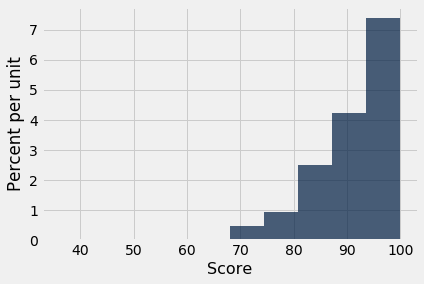

In [1]:
pop_restaurants.hist('Score') 

Often it is impossible to find complete datasets like this.  Imagine we instead had access only to a random sample of 100 restaurant inspections, called `restaurant_sample`that we create below. We are interested in using this sample to estimate the population mean. A histogram of the **sample** scores in the cell below. 

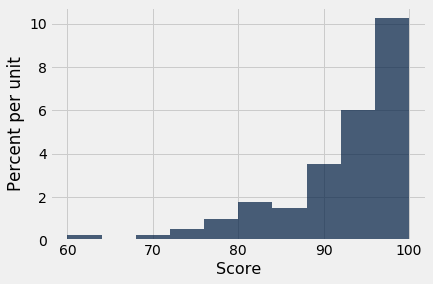

In [1]:
restaurant_sample = pop_restaurants.sample(100, with_replacement=False
restaurant_sample.hist('Score')

The function `bootstrap_scores` (below) simulates drawing `samples` resamples from `restaurant_sample` and computing the mean restaurant score in each resample.  The call `bootstrap_scores(5000)` returns an array of those 5000 resample means. Take a look at the resulting histogram of the **resampled means**.

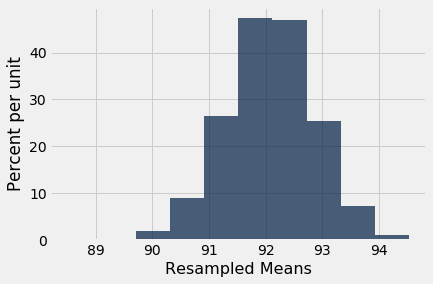

In [1]:
def bootstrap_scores(samples):
    resampled_means = make_array()
    for i in range(5000):
        resampled_mean = np.mean(restaurant_sample.sample().column('Score')) 
        resampled_means = np.append(resampled_means, resampled_mean)
    return resampled_means 

resampled_means = bootstrap_scores(5000)
Table().with_column('Resampled Means', resampled_means).hist()

**Question 1.** Does the distribution of the *resampled* mean scores look normally distributed? State "yes" or "no" and describe in one sentence why you would expect that result.

**Question 2.** Does the distribution of the **sampled scores** look normally distributed? State "yes" or "no" and describe in one sentence why you should expect this result.

**Hint:** Remember that we are no longer talking about the resampled means!

In [ ]:
_ = ok.backup()

## 3. Confidence Intervals (22 points)

Four candidates are running for President of Dataland. A polling company surveys 1000 people selected uniformly at random from among voters in Dataland, and it asks each one who they are planning on voting for. After compiling the results, the polling company releases the following proportions from their sample:

|Candidate  | Proportion|
|:------------:|:------------:|
|Candidate C | 0.47 |
|Candidate T | 0.38 |
|Candidate J | 0.08 |
|Candidate S | 0.03 |
|Undecided   | 0.04 |

These proportions represent a uniform random sample of the population of Dataland. We will attempt to estimate the corresponding *population parameters*, or the proportion of the votes that each candidate received from the entire population.  We will use confidence intervals to compute a range of values that reflects the uncertainty of our estimate.

The table `votes` contains the results of the survey. Candidates are represented by their initials. Undecided voters are denoted by `U`.

In [ ]:
votes = Table().with_column('vote', np.array(['C']*470 + ['T']*380 + ['J']*80 + ['S']*30 + ['U']*40))
num_votes = votes.num_rows
votes.sample()

**Question 1.** Below, complete the given  code that will use `samples` bootstrapped samples from `votes` to compute estimates of the true proportion of voters who are planning on voting for **Candidate C**. 

In [ ]:
def proportions_in_resamples(samples):
    prop_c = make_array()
    for i in np.arange(...):
        bootstrap = ...
        single_proportion = np.count_nonzero(...) / ...
        prop_c = np.append(prop_c, single_proportion)
    return prop_c

**Question 2.** In the following cell, we run the function you just defined, `proportions_in_resamples`, and create a histogram of the calculated statistic for the 5,000 bootstraps. Based on what the original polling proportions were, does the graph seem reasonable (Yes or No)? Briefly answer in the empty cell below.

In [ ]:
sampled_proportions = proportions_in_resamples(5000)
Table().with_column('Estimated Proportion', sampled_proportions).hist(bins=np.arange(0.2,0.6,0.01))

**Question 3.** Using the array `sampled_proportions`, find the values that bound the middle 95% of the values in the data. (Compute the lower and upper ends of the interval, named `c_lower_bound` and `c_upper_bound`, respectively.)

In [ ]:
c_lower_bound = ...
c_upper_bound = ...
print("Bootstrapped 95% confidence interval for the proportion of C voters in the population: [{:f}, {:f}]".format(c_lower_bound, c_upper_bound))

**Question 4.** The survey results seem to indicate that Candidate C is beating Candidate T among voters. We would like to use confidence intervals to determine a range of likely values for her true *lead*. Candidate C's lead over Candidate T is:

$$\text{Candidate C's proportion of the vote} - \text{Candidate T's proportion of the vote}.$$

Using the function `proportions_in_resamples` above as a model, use the bootstrap to compute an approximate distribution for Candidate C's lead over Candidate T. Plot a histogram of the the resulting samples.

In [ ]:
bins = np.arange(-0.2,0.2,0.01)

def leads_in_resamples(samples):
    leads = make_array()
    ...
    return leads

sampled_leads = leads_in_resamples(5000)
...

In [ ]:
diff_lower_bound = ...
diff_upper_bound = ...
print("Bootstrapped 95% confidence interval for Candidate C's true lead over Candidate T: [{:f}, {:f}]".format(diff_lower_bound, diff_upper_bound))

 ** Question 5.** The staff computed the following 95% confidence interval for the proportion of Candidate C voters: 

$$[.439, .5]$$

(Your answer may have been different; that doesn't mean it was wrong!)


Can we say that 95% of the population lies in the range $[.439, .5]$? Explain your answer. 

In [ ]:
_ = ok.backup()

## 4. Regression (29 points)
Does skill in one sport imply skill in a related sport?  The answer might be different for different activities.  Let us find out whether it's true for the [triple jump](https://en.wikipedia.org/wiki/Triple_jump) (a horizontal jump similar to a long jump) and the vertical jump.  Since we're learning about linear regression, we will look specifically for a *linear* association between skill level in the two sports.

The following data was collected by observing 40 collegiate level soccer players.  Each athlete's distances in both jump activities were measured in centimeters. Run the cell below to load the data.

In [ ]:
# Run this cell to load the data
jumps = Table.read_table('triple_vertical.csv')
jumps

**Question 1.** Before running a regression, it's important to see what the data look like, because our eyes are good at picking out unusual patterns in data.  Draw a scatter plot with the triple jump distances on the horizontal axis and the vertical jump heights on vertical axis. 

** Question 2.** Does the correlation coefficient `r` *look* closest to 0, .5, or -.5? Explain. 

**Question 3.** Now, write code to calculate the correlation coefficient between the triple jump distances and the vertical jump heights.

*Hint*: It may be helpful to define and use the function `std_units`.



In [ ]:
r = ...

** Question 4.** Write a function vert_predictor which takes a table, `t` with two columns and the triple jump distance, `tj`, (in centimeters) as arguments and predicts the person's vertical jump. The first column of the table is the x-axis, and the second column is the y-axis.  It should compute the correlation (r) between the two columns, then compute the slope and intercept of the regression line that predicts the second column from the first, in original units (centimeters). Use the slope and intercept to predict the vertical jump and return that value.

In [ ]:
def vert_predictor(t, tj):
    r = ...
    slope = ...
    intercept = ...
    ...


** Question 5.**
Let's use `vert_predictor` to predict what certain athletes' vertical jump heights would be given their triple jump distances.

The world record for the triple jump distance is 18.29 *meters* by Johnathan Edwards. What's our prediction for what Edwards' vertical jump would be? Store the value in `triple_record_vert_est`.

**Hint:** Make sure to convert from meters to centimeters! There are 100 centimeters in one meter.

In [ ]:
triple_record_vert_est = ...
print("Predicted vertical jump distance: {:f} centimeters".format(triple_record_vert_est))

**Question 6.** Do you expect this estimate to be accurate within a few centimeters? Why or why not?

*Hint:* Compare Edwards' triple jump distance to the triple jump distances in `jumps`. Is it relatively similar to the rest of the data? 

** Question 7.** Now, using the `vert_predictor` you defined in the previous question, make another scatter plot with triple jump distances on the horizontal axis and both *real* and ***predicted*** vertical jump heights on vertical axis. The color of the dots for the real vertical jump heights  should be different from the color for the predicted vertical jump heights.

Hints:
* An example of such a scatter plot is in Section [15.2](https://dukecs.github,io/textbook/chapters/15/2/regression-line.html)

## 5. Submitting (1 point)

Once you're finished,
1. select "Save and Checkpoint" in the File menu, and 
2. then execute the `submit` cell below. 

The result will contain a link that you can use to check that your test has been submitted successfully. If you submit more than once before the deadline, we will only grade your final submission. If you mistakenly submit the wrong one, you can head to [okpy.org](https://okpy.org/) and flag the correct version. To do so, go to the website, click on this assignment, and find the version you would like to have graded. There should be an option to flag that submission for grading!

**After you have submitted, you must go back to the Sakai quiz and confirm that you have adhered to the rules for this test.**

In [ ]:
_ = ok.submit()